In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [25]:
# Create a porfoltio of stocks
tickers = ['AAPL', 'FB', 'C', 'DIS']

# Pick the weights of each stock (must add to 1)
weights = np.array([0.2, 0.4, 0.25, 0.15])

# The size of the portfolio
portfolio_value = 10000

# The condifence interval
confidence = 0.95  # 95%

In [26]:
# Get the closing price for the list of tickers
data = yf.download(tickers, start = '2018-01-01', end = '2025-07-12')['Close']

data.head(10)

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,C,DIS,FB
Date,,,,
2018-01-02,40.426826,57.589909,106.943245,NaN
2018-01-03,40.419781,57.768028,107.402390,NaN
2018-01-04,40.607533,58.480564,107.354561,NaN
2018-01-05,41.069859,58.403111,106.771042,NaN
2018-01-08,40.917316,57.721565,105.240547,NaN
2018-01-09,40.912628,58.325645,105.164040,NaN
2018-01-10,40.903236,58.588989,104.714439,NaN
2018-01-11,41.135574,58.519257,106.168427,NaN
2018-01-12,41.560349,59.510597,107.584129,NaN


In [27]:
# Compute daily return of each stock
returns = data.pct_change()

# Compute the daily mean return of each stock
mean_returns = returns.mean()

# Compute portfolio mean return
port_mean = mean_returns.dot(weights)

# Mean of investment returns
investment_mean_returns = (1 + port_mean) * portfolio_value

# Compute the portfolio covariance matrix
cov_matrix = returns.cov()

# Compute portfoio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Standartd deviation of investment returns
investment_stdev = portfolio_value * port_stdev

In [30]:
# PPF thakes a percentage and returns a standard deviation
# Multiplier for what value that percentage occurs at
# It is equivalent to a on-tail test on the density plot
percent_point = norm.ppf(confidence, investment_mean_returns, investment_stdev)

# Calculate VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

print(f"PPF: {percent_point}")
print(f"Portfolio VaR: {value_at_risk}")

PPF: 10254.263308139407
Portfolio VaR: -254.26330813940694


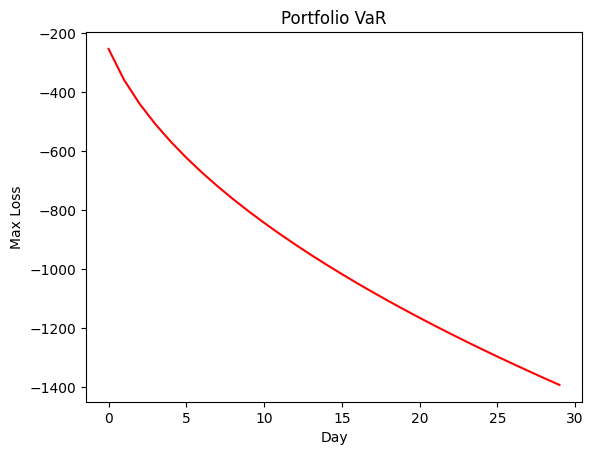

In [29]:
value_at_risks = value_at_risk * np.sqrt(range(1, 31))

# build plot of VaR over time
plt.xlabel('Day')
plt.ylabel('Max Loss')
plt.title('Portfolio VaR')
plt.plot(value_at_risks, "r")